In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
Insurance_df = pd.read_csv("Resources/Insurance_claims.csv")
Insurance_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [27]:
# Determine the number of unique values in each column.
Insurance_df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [28]:
# Look at APPLICATION_TYPE value counts for binning
insurance_type_counts= Insurance_df['fraud_reported'].value_counts()
insurance_type_counts
     

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:ylabel='Density'>

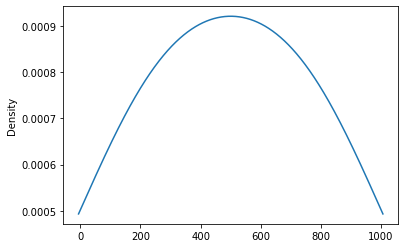

In [29]:
# Visualize the value counts of APPLICATION_TYPE
insurance_type_counts.plot.density()

In [49]:
df=Insurance_df.loc[:,['policy_state','policy_deductable','policy_annual_premium','umbrella_limit',
                       'capital-gains','capital-loss','collision_type','incident_state','incident_city',
                      'property_damage','bodily_injuries','total_claim_amount','injury_claim', 'property_claim', 
                       'vehicle_claim', 'auto_make','auto_model','fraud_reported']]
df

,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,collision_type,incident_state,incident_city,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,OH,1000,1406.91,0,53300,0,Side Collision,SC,Columbus,YES,1,71610,6510,13020,52080,Saab,92x,Y
1,IN,2000,1197.22,5000000,0,0,?,VA,Riverwood,?,0,5070,780,780,3510,Mercedes,E400,Y
2,OH,2000,1413.14,5000000,35100,0,Rear Collision,NY,Columbus,NO,2,34650,7700,3850,23100,Dodge,RAM,N
3,IL,2000,1415.74,6000000,48900,-62400,Front Collision,OH,Arlington,?,1,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,IL,1000,1583.91,6000000,66000,-46000,?,NY,Arlington,NO,0,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,1000,1310.80,0,0,0,Front Collision,NC,Northbrook,YES,0,87200,17440,8720,61040,Honda,Accord,N
996,IL,1000,1436.79,0,70900,0,Rear Collision,SC,Northbend,YES,2,108480,18080,18080,72320,Volkswagen,Passat,N
997,OH,500,1383.49,3000000,35100,0,Side Collision,NC,Arlington,?,2,67500,7500,7500,52500,Suburu,Impreza,N
998,IL,2000,1356.92,5000000,0,0,Rear Collision,NY,Arlington,?,0,46980,5220,5220,36540,Audi,A5,N


In [31]:
Insurance_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   policy_state           1000 non-null   object 
 1   policy_deductable      1000 non-null   int64  
 2   policy_annual_premium  1000 non-null   float64
 3   umbrella_limit         1000 non-null   int64  
 4   capital-gains          1000 non-null   int64  
 5   capital-loss           1000 non-null   int64  
 6   collision_type         1000 non-null   object 
 7   incident_state         1000 non-null   object 
 8   incident_city          1000 non-null   object 
 9   property_damage        1000 non-null   object 
 10  bodily_injuries        1000 non-null   int64  
 11  total_claim_amount     1000 non-null   int64  
 12  injury_claim           1000 non-null   int64  
 13  property_claim         1000 non-null   int64  
 14  vehicle_claim          1000 non-null   int64  
 15  auto_

In [56]:
df=Insurance_df.loc[:,['capital-gains','capital-loss','bodily_injuries','total_claim_amount','injury_claim', 'property_claim', 
                       'vehicle_claim','fraud_reported']]
df

,capital-gains,capital-loss,bodily_injuries,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,53300,0,1,71610,6510,13020,52080,Y
1,0,0,0,5070,780,780,3510,Y
2,35100,0,2,34650,7700,3850,23100,N
3,48900,-62400,1,63400,6340,6340,50720,Y
4,66000,-46000,0,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...
995,0,0,0,87200,17440,8720,61040,N
996,70900,0,2,108480,18080,18080,72320,N
997,35100,0,2,67500,7500,7500,52500,N
998,0,0,0,46980,5220,5220,36540,N


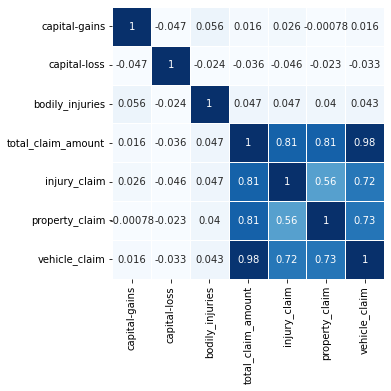

In [59]:
#heatmap 
plt.figure(figsize = (6,5))
corr = df.corr()
sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', annot =  True,  linewidth =1,fmt = '.2g',data = corr)
plt.show()